In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Load DATASET**

In [ ]:
#To display max. columns

pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Load the Dataset.

df = pd.read_csv('/content/Gurgaon_RealEstate.csv')

In [ ]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,2.0,NaN,New Property,1081.0,NaN,650.0,0,0,0,0,0,0,8
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,4.0,NaN,New Property,NaN,NaN,1103.0,1,1,0,0,0,0,38
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,0.0,NaN,Under Construction,NaN,NaN,58141.0,0,0,0,0,0,0,15
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,17.0,NaN,New Property,NaN,1000.0,585.0,0,0,0,0,0,0,49
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,10.0,North-West,Relatively New,1995.0,1615.0,1476.0,0,1,0,0,1,1,174


# **Identifying features in Dataset & their types**

In [ ]:
#Identify the features(columns) in dataset and their datatypes.

print("Features and Data Types:")
print(df.info())

Features and Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3803 entries, 0 to 3802
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3803 non-null   object 
 1   society              3802 non-null   object 
 2   sector               3803 non-null   object 
 3   price                3785 non-null   float64
 4   price_per_sqft       3785 non-null   float64
 5   area                 3785 non-null   float64
 6   areaWithType         3803 non-null   object 
 7   bedRoom              3803 non-null   int64  
 8   bathroom             3803 non-null   int64  
 9   balcony              3803 non-null   object 
 10  floorNum             3784 non-null   float64
 11  facing               2698 non-null   object 
 12  agePossession        3803 non-null   object 
 13  super_built_up_area  1915 non-null   float64
 14  built_up_area        1733 non-null   float64
 15  carpet_area  

# **Univariate Analysis**

**Initial Data Exploration**

In [ ]:
#Check for missing values

missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 19
facing                 1105
agePossession             0
super_built_up_area    1888
built_up_area          2070
carpet_area            1859
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64


**Property type Analysis**

In [ ]:
#No.of missing values

df['property_type'].isnull().sum()

0

In [ ]:
#No.of properties w.r.t property_type
property_type_counts = df['property_type'].value_counts()
print(property_type_counts)

property_type
flat     2943
house     860
Name: count, dtype: int64


<ipython-input-16-774338b1209a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=property_type_counts.index, y=property_type_counts.values, palette='Set3')


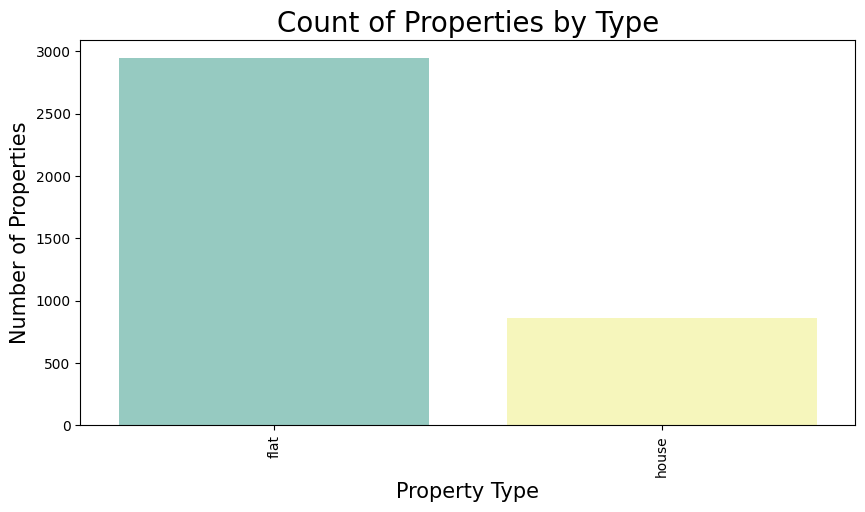

In [ ]:
#Creating a bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x=property_type_counts.index, y=property_type_counts.values, palette='Set3')

#Adding labels and title
plt.ylabel('Number of Properties', fontsize=15)
plt.xlabel('Property Type', fontsize=15)
plt.title('Count of Properties by Type', fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

**Society Analysis**

In [ ]:
#No.of missing values

df['society'].isnull().sum()

1

In [ ]:
#To display all rows
pd.set_option('display.max_rows', None)

In [ ]:
#No.of properties w.r.t society

society_count = df['society'].value_counts()
print(society_count)


society
independent                                          486
tulip violet                                          75
ss the leaf                                           74
shapoorji pallonji joyville gurugram                  45
dlf new town heights                                  42
signature global park                                 37
shree vardhman victoria                               35
smart world gems                                      33
smart world orchard                                   33
emaar mgf emerald floors premier                      32
paras dews                                            31
dlf the ultima                                        31
dlf regal gardens                                     30
m3m woodshire                                         30
shree vardhman flora                                  29
la vida by tata housing                               28
signature global solera                               27
godrej nature plus     

In [ ]:
#Total no.of societies
print(len(society_count))

676


In [ ]:
#Delete independent societies and update it to the df

independent_societies = ['independent']

for society in independent_societies:
  df = df[df['society'] != society]

In [ ]:
df.shape

(3317, 23)

In [ ]:
#No.of properties w.r.t society

society_count = df['society'].value_counts()
print(society_count)

society
tulip violet                                         75
ss the leaf                                          74
shapoorji pallonji joyville gurugram                 45
dlf new town heights                                 42
signature global park                                37
shree vardhman victoria                              35
smart world gems                                     33
smart world orchard                                  33
emaar mgf emerald floors premier                     32
dlf the ultima                                       31
paras dews                                           31
dlf regal gardens                                    30
m3m woodshire                                        30
shree vardhman flora                                 29
la vida by tata housing                              28
signature global solera                              27
godrej nature plus                                   27
emaar gurgaon greens                    

In [ ]:
#Total no.of societies
print(len(society_count))

675


In [ ]:
#Creating frequency bins for societies
society_bins = {
    "Very High (>100)": (society_count > 100).sum(),
    "High (60-100)": ((society_count >= 60) & (society_count <= 100)).sum(),
    "Average (15-59)": ((society_count >= 15) & (society_count <= 59)).sum(),
    "Low (6-14)": ((society_count >= 6) & (society_count <= 14)).sum(),
    "Very Low (1-5)": ((society_count >= 1) & (society_count <= 5)).sum()
}
society_bins

{'Very High (>100)': 0,
 'High (60-100)': 2,
 'Average (15-59)': 59,
 'Low (6-14)': 100,
 'Very Low (1-5)': 514}

In [ ]:
#Top 10 societies excluding independent

top_societies = society_count.head(10)
print(top_societies)

society
tulip violet                            75
ss the leaf                             74
shapoorji pallonji joyville gurugram    45
dlf new town heights                    42
signature global park                   37
shree vardhman victoria                 35
smart world gems                        33
smart world orchard                     33
emaar mgf emerald floors premier        32
dlf the ultima                          31
Name: count, dtype: int64


<ipython-input-32-34abfd798542>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_societies.index, y=top_societies.values, palette='Set1')


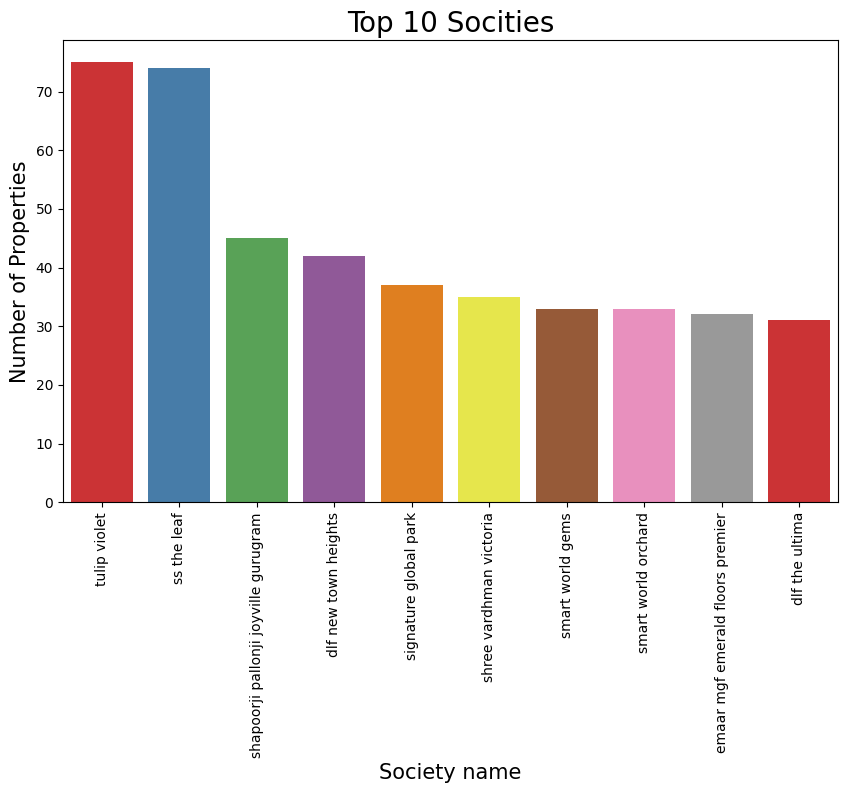

In [ ]:
#Plotting graph of top 10 societies acc. to no.of flats

plt.figure(figsize = (10,6))
sns.barplot(x=top_societies.index, y=top_societies.values, palette='Set1')

#Adding labels and title
plt.ylabel('Number of Properties', fontsize=15)
plt.xlabel('Society name', fontsize=15)
plt.title('Top 10 Socities', fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

**Sector Analysis**

In [ ]:
#No.of missing values

df['sector'].isnull().sum()

0

In [ ]:
#No.of properties w.r.t sector

sector_count = df['sector'].value_counts()
print(sector_count)

sector
sohna road           166
sector 102           113
sector 85            110
sector 92            104
sector 69             93
sector 90             91
sector 65             90
sector 81             89
sector 109            87
sector 79             80
sector 33             74
sector 104            70
sector 83             69
sector 86             67
sector 95             66
sector 37d            66
sector 89             64
sector 107            60
sector 108            57
sector 50             55
sector 48             54
sector 37             54
sector 70a            53
sector 70             53
sector 84             51
sector 99             48
sector 56             47
sector 67             46
sector 49             46
sector 66             46
sector 2              45
sector 103            44
sector 113            43
sector 61             42
sector 82             40
sector 43             39
sector 106            38
sector 28             33
sector 68             30
manesar           

In [ ]:
#Total no.of sectors

print(len(sector_count))

102


In [ ]:
#Creating frequency bins for sectors

frequency_bins = {
    "Very High (>100)": (sector_count > 100).sum(),
    "High (60-100)": ((sector_count >= 60) & (sector_count <= 100)).sum(),
    "Average (15-59)": ((sector_count >= 15) & (sector_count <= 59)).sum(),
    "Low (6-14)": ((sector_count >= 6) & (sector_count <= 14)).sum(),
    "Very Low (1-5)": ((sector_count >= 1) & (sector_count <= 5)).sum()
}
frequency_bins

{'Very High (>100)': 4,
 'High (60-100)': 14,
 'Average (15-59)': 47,
 'Low (6-14)': 18,
 'Very Low (1-5)': 19}

In [ ]:
#Top 10 sectors acc. to no.of flats/houses

top_sectors = sector_count[sector_count.index].head(10)
print(top_sectors)

sector
sohna road    166
sector 102    113
sector 85     110
sector 92     104
sector 69      93
sector 90      91
sector 65      90
sector 81      89
sector 109     87
sector 79      80
Name: count, dtype: int64


<ipython-input-38-43c2a53f725d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sectors.index, y=top_sectors.values, palette='Set1')


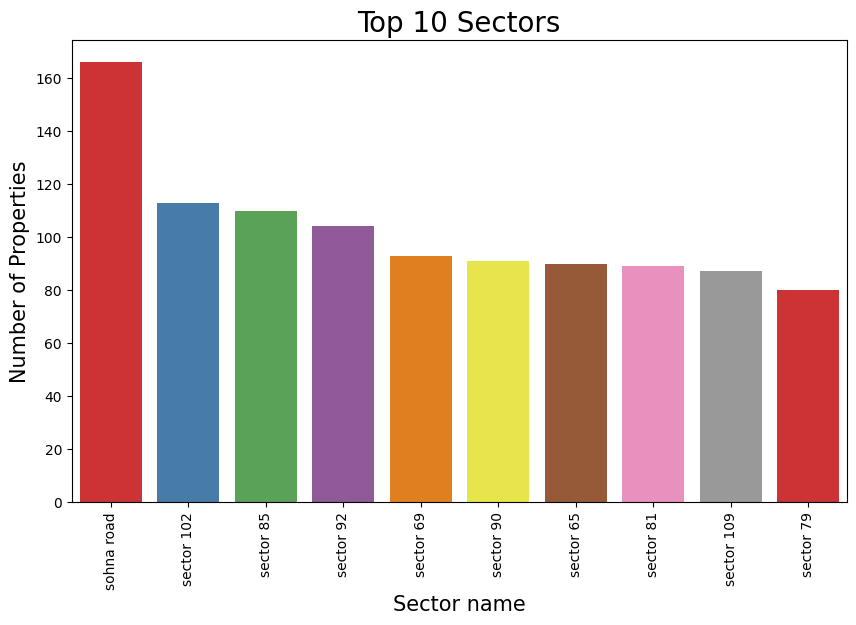

In [ ]:
#Plotting graph of top 10 sectors

plt.figure(figsize = (10,6))
sns.barplot(x=top_sectors.index, y=top_sectors.values, palette='Set1')

#Adding labels and title
plt.ylabel('Number of Properties', fontsize=15)
plt.xlabel('Sector name', fontsize=15)
plt.title('Top 10 Sectors', fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

**Price Analysis**

In [ ]:
#No.of missing values

df['price'].isnull().sum()

13

In [ ]:
#Statistical summary of price column

df['price'].describe()

count    3304.000000
mean        2.223284
std         2.552565
min         0.160000
25%         0.920000
50%         1.450000
75%         2.350000
max        31.500000
Name: price, dtype: float64

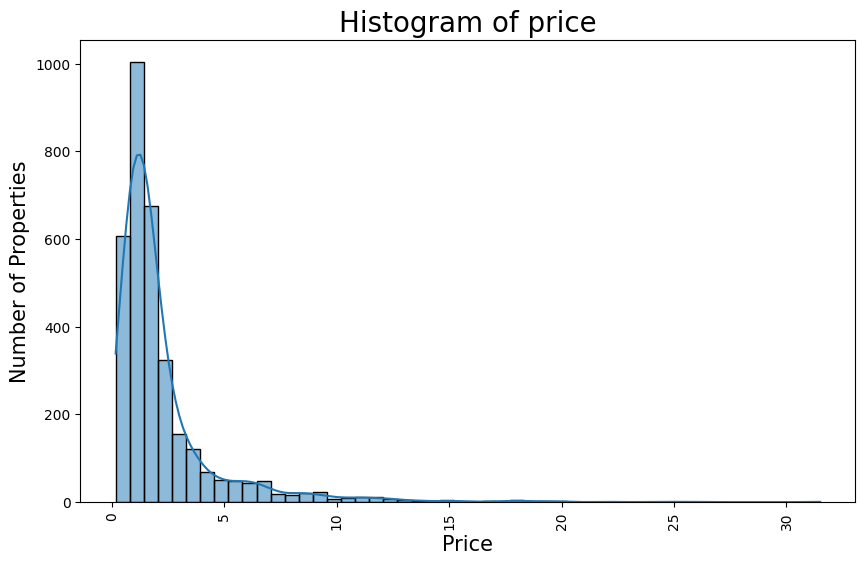

In [ ]:
#Plotting histogram of price

plt.figure(figsize = (10,6))
sns.histplot(df['price'], kde=True, bins=50)

#Adding labels and title
plt.ylabel('Number of Properties', fontsize=15)
plt.xlabel('Price', fontsize=15)
plt.title('Histogram of price', fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

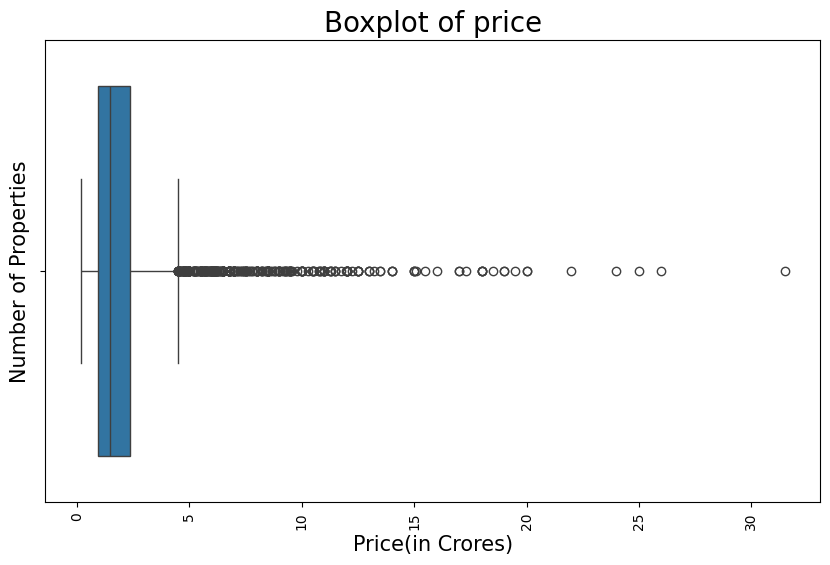

In [ ]:
#Boxplot of price

plt.figure(figsize = (10,6))
sns.boxplot(x=df['price'])

#Adding labels and title
plt.ylabel('Number of Properties', fontsize=15)
plt.xlabel('Price(in Crores)', fontsize=15)
plt.title('Boxplot of price', fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
#Finding Skewness and Kurtosis

skewness = df['price'].skew()
kurtosis = df['price'].kurt()

print(skewness,kurtosis)

3.803469637490276 21.377596968556386


In [ ]:
#Price analysis acc. to quantiles

quantiles = df['price'].quantile([0.01,0.05, 0.1, 0.9, 0.95,0.99])

quantiles

0.01     0.2403
0.05     0.3600
0.10     0.5000
0.90     4.7500
0.95     7.0000
0.99    12.5000
Name: price, dtype: float64

In [ ]:
#Creating price bins

price_bins = {
    "0-1 Crore": ((df['price'] >= 0) & (df['price'] < 1)).sum(),
    "1-2 Crore": ((df['price'] >= 1) & (df['price'] < 2)).sum(),
    "2-3 Crore": ((df['price'] >= 2) & (df['price'] < 3)).sum(),
    "3-4 Crore": ((df['price'] >= 3) & (df['price'] < 4)).sum(),
    "4-5 Crore": ((df['price'] >= 4) & (df['price'] < 5)).sum(),
    "5-6 Crore": ((df['price'] >= 5) & (df['price'] < 6)).sum(),
    "6-7 Crore": ((df['price'] >= 6) & (df['price'] < 7)).sum(),
    "7-8 Crore": ((df['price'] >= 7) & (df['price'] < 8)).sum(),
    "8-9 Crore": ((df['price'] >= 8) & (df['price'] < 9)).sum(),
    "9-10 Crore": ((df['price'] >= 9) & (df['price'] <= 10)).sum(),
    "10 Crore+": (df['price'] > 10).sum()
}

print(price_bins)

{'0-1 Crore': 940, '1-2 Crore': 1285, '2-3 Crore': 476, '3-4 Crore': 195, '4-5 Crore': 93, '5-6 Crore': 73, '6-7 Crore': 73, '7-8 Crore': 34, '8-9 Crore': 34, '9-10 Crore': 30, '10 Crore+': 71}


<ipython-input-46-0b303cc66f3e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=price_bins.index, y=price_bins.values, palette='Set1')


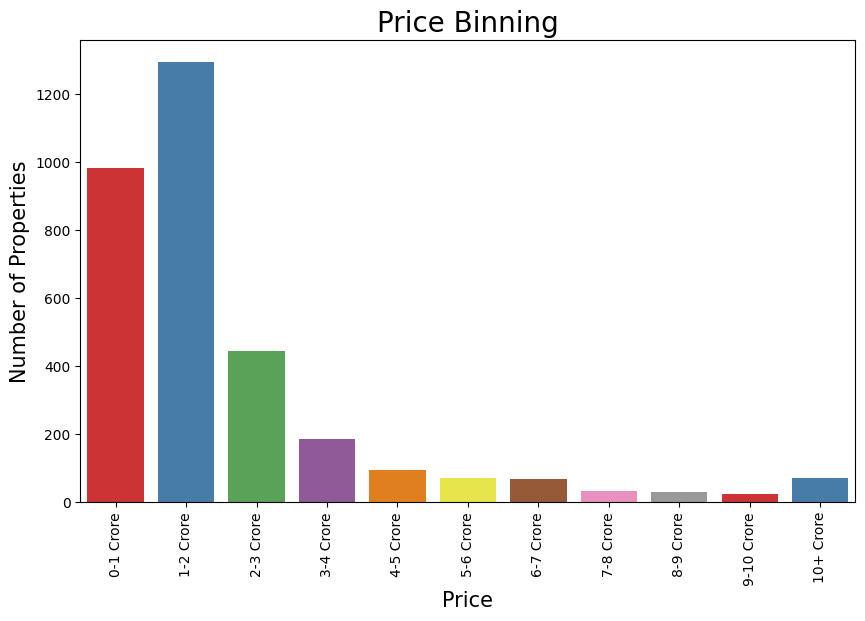

In [ ]:
#Plotting bar graph price binning

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.barplot(x=price_bins.index, y=price_bins.values, palette='Set1')

# Adding labels and title
plt.ylabel('Number of Properties', fontsize=15)
plt.xlabel('Price', fontsize=15)
plt.title('Price Binning', fontsize=20)
plt.xticks(rotation='vertical')
plt.show()


**Price per sq.ft Analysis**

In [ ]:
#No.of missing values

df['price_per_sqft'].isnull().sum()

13

In [ ]:
#Statistical summary of price_per_sqft

df['price_per_sqft'].describe()

count      3304.000000
mean      11990.838680
std       20506.594326
min           4.000000
25%        6655.000000
50%        8615.000000
75%       12237.250000
max      600000.000000
Name: price_per_sqft, dtype: float64

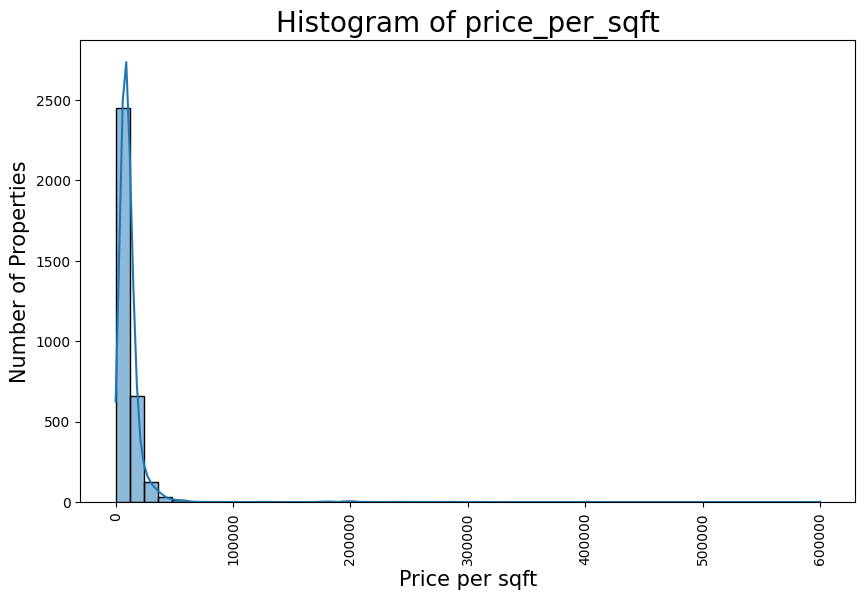

In [ ]:
#Plotting histogram of price_per_sqft

plt.figure(figsize = (10,6))
sns.histplot(df['price_per_sqft'], kde=True, bins=50)

#Adding labels and title
plt.ylabel('Number of Properties', fontsize=15)
plt.xlabel('Price per sqft', fontsize=15)
plt.title('Histogram of price_per_sqft', fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

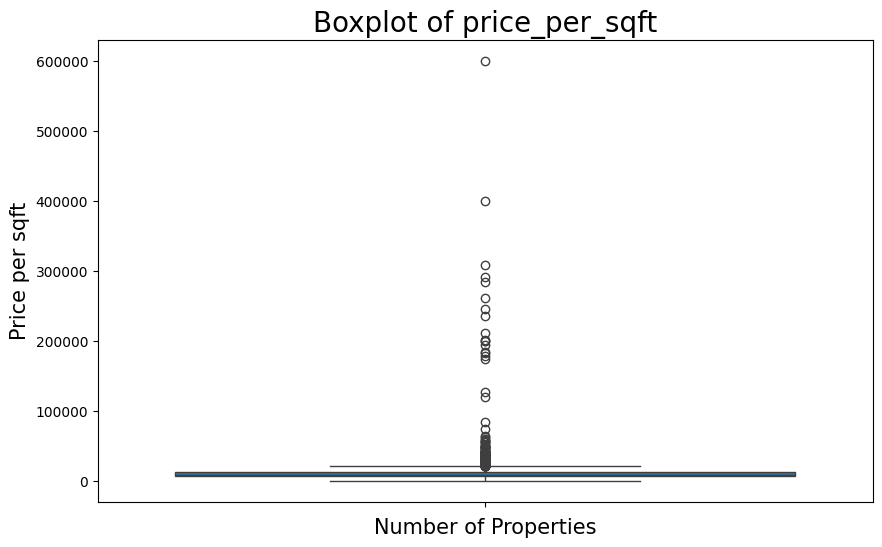

In [ ]:
#Boxplot of price_per_sqft

plt.figure(figsize = (10,6))
sns.boxplot(df['price_per_sqft'])

#Adding labels and title
plt.ylabel('Price per sqft', fontsize=15)
plt.xlabel('Number of Properties', fontsize=15)
plt.title('Boxplot of price_per_sqft', fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

**bedRoom Analysis**

In [ ]:
#No.of missing values

df['bedRoom'].isnull().sum()

0

In [ ]:
#No.of properties w.r.t no.of bedrooms

df['bedRoom'].value_counts().sort_index()

bedRoom
1      104
2      944
3     1468
4      591
5      123
6       32
7       13
8        7
9       13
10       6
12      10
13       2
16       3
18       1
Name: count, dtype: int64

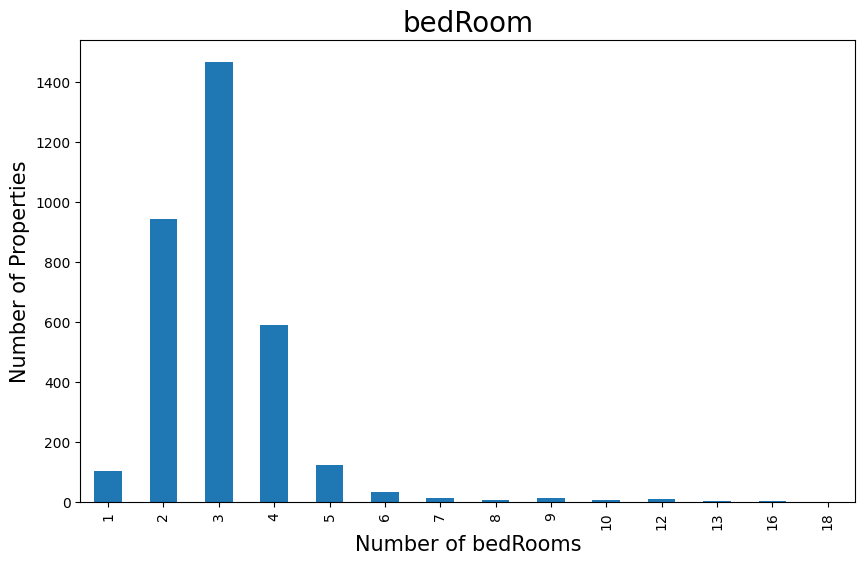

In [ ]:
#Plotting graph of bedroom

plt.figure(figsize = (10,6))
df['bedRoom'].value_counts().sort_index().plot(kind='bar')

#Adding labels and title
plt.ylabel('Number of Properties', fontsize=15)
plt.xlabel('Number of bedRooms', fontsize=15)
plt.title('bedRoom', fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

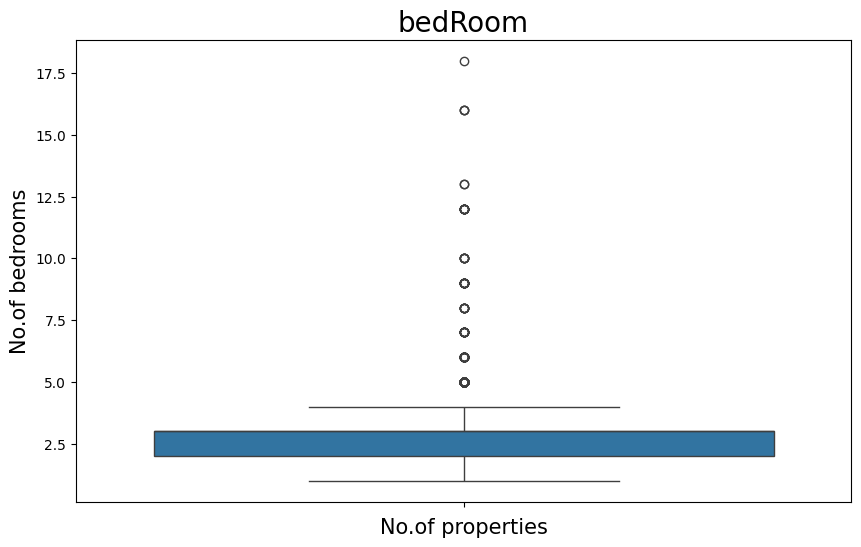

In [ ]:
#Boxplot of bedRoom

plt.figure(figsize = (10,6))
sns.boxplot(df['bedRoom'])

#Adding labels and title
plt.ylabel('No.of bedrooms', fontsize=15)
plt.xlabel('No.of properties', fontsize=15)
plt.title('bedRoom', fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

**bathroom Analysis**

In [ ]:
#No.of missing values

df['bathroom'].isnull().sum()

0

In [ ]:
#No.of properties w.r.t no.of bathrooms

df['bathroom'].value_counts().sort_index()

bathroom
1      116
2     1047
3     1027
4      732
5      241
6       88
7       24
8        9
9       15
10       2
12       9
13       2
16       2
17       1
18       1
20       1
Name: count, dtype: int64

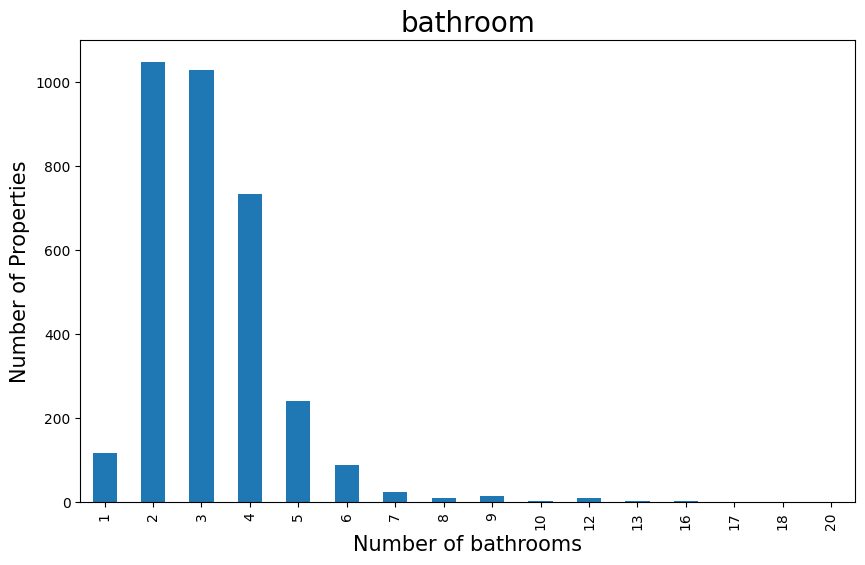

In [ ]:
#Plotting graph of bathroom

plt.figure(figsize = (10,6))
df['bathroom'].value_counts().sort_index().plot(kind='bar')

#Adding labels and title
plt.ylabel('Number of Properties', fontsize=15)
plt.xlabel('Number of bathrooms', fontsize=15)
plt.title('bathroom', fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

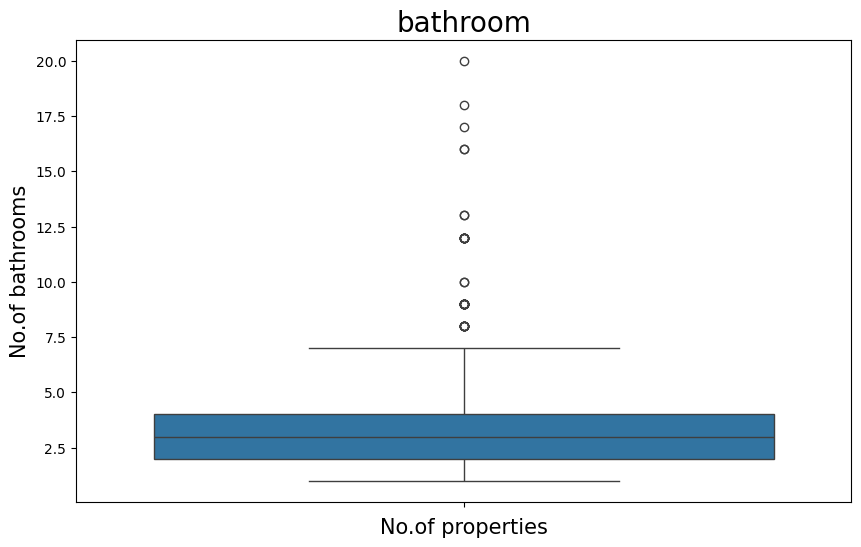

In [ ]:
#Boxplot of bathroom

plt.figure(figsize = (10,6))
sns.boxplot(df['bathroom'])

#Adding labels and title
plt.ylabel('No.of bathrooms', fontsize=15)
plt.xlabel('No.of properties', fontsize=15)
plt.title('bathroom', fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

**balcony Analysis**

In [ ]:
#No.of missing values

df['balcony'].isnull().sum()

0

In [ ]:
#No.of properties w.r.t no.of balconies

df['balcony'].value_counts().sort_index()

balcony
0      113
1      314
2      809
3     1043
3+    1038
Name: count, dtype: int64

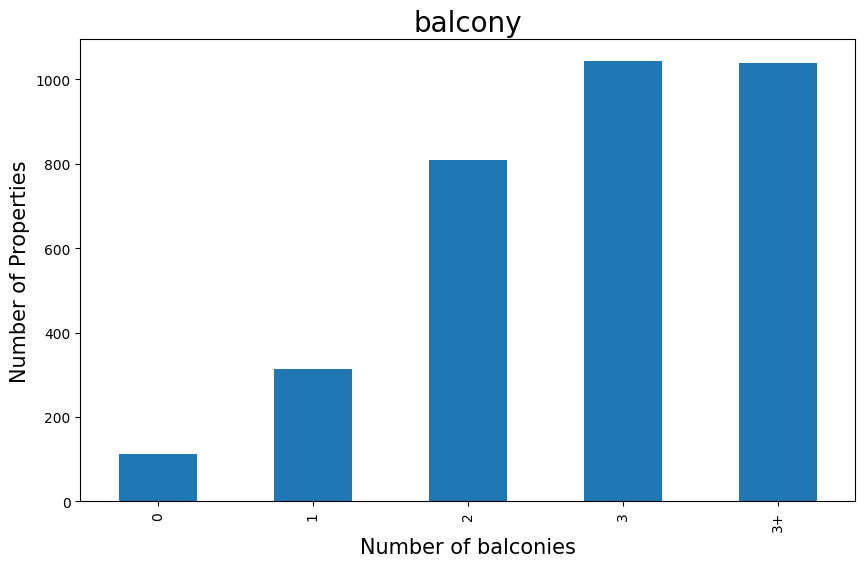

In [ ]:
#Plotting graph of balcony

plt.figure(figsize = (10,6))
df['balcony'].value_counts().sort_index().plot(kind='bar')

#Adding labels and title
plt.ylabel('Number of Properties', fontsize=15)
plt.xlabel('Number of balconies', fontsize=15)
plt.title('balcony', fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

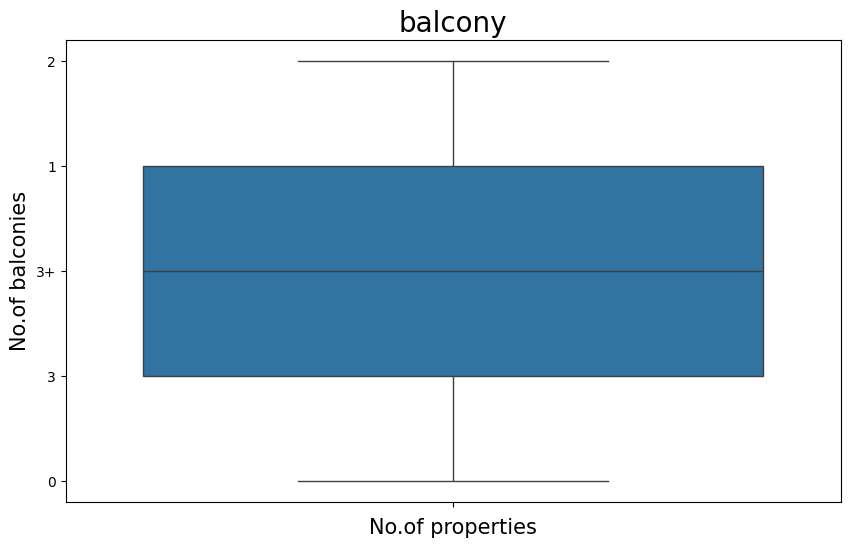

In [ ]:
#Boxplot of balcony

plt.figure(figsize = (10,6))
sns.boxplot(df['balcony'])

#Adding labels and title
plt.ylabel('No.of balconies', fontsize=15)
plt.xlabel('No.of properties', fontsize=15)
plt.title('balcony', fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

**floorNum Analysis**

In [ ]:
#No.of missing values

df['floorNum'].isnull().sum()

10

In [ ]:
#No.of properties w.r.t floor number

df['floorNum'].value_counts().sort_index()

floorNum
0.0     131
1.0     254
2.0     376
3.0     361
4.0     257
5.0     171
6.0     185
7.0     183
8.0     197
9.0     170
10.0    185
11.0    116
12.0    161
13.0     43
14.0    120
15.0     83
16.0     53
17.0     50
18.0     37
19.0     34
20.0     26
21.0     16
22.0     14
23.0     15
24.0     11
25.0      9
26.0      5
27.0      8
28.0      4
29.0      3
30.0      5
31.0      4
32.0      2
33.0      4
34.0      2
35.0      2
38.0      1
39.0      2
40.0      2
43.0      2
44.0      1
45.0      1
51.0      1
Name: count, dtype: int64

In [ ]:
#Statistical summary of floorNum

df['floorNum'].describe()

count    3307.000000
mean        7.436952
std         6.183609
min         0.000000
25%         3.000000
50%         6.000000
75%        11.000000
max        51.000000
Name: floorNum, dtype: float64

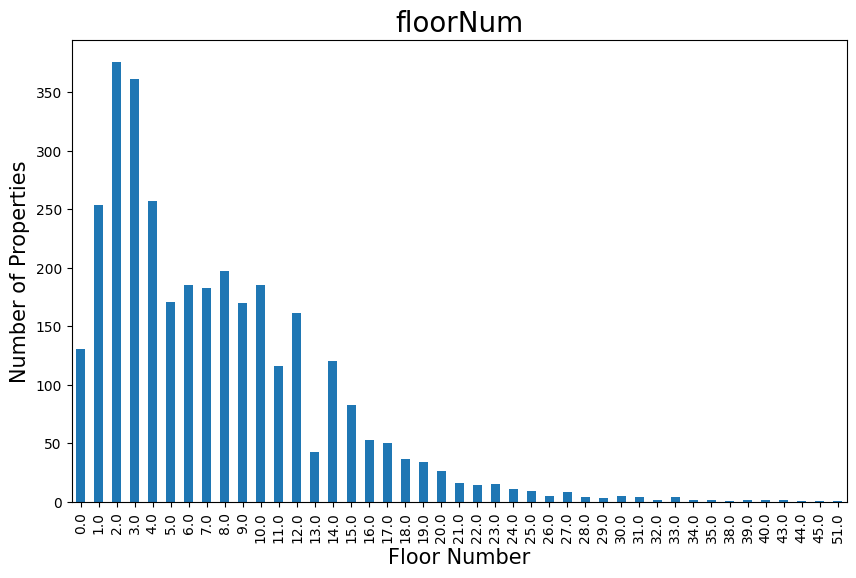

In [ ]:
#Plotting graph of floorNum

plt.figure(figsize = (10,6))
df['floorNum'].value_counts().sort_index().plot(kind='bar')

#Adding labels and title
plt.ylabel('Number of Properties', fontsize=15)
plt.xlabel('Floor Number', fontsize=15)
plt.title('floorNum', fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

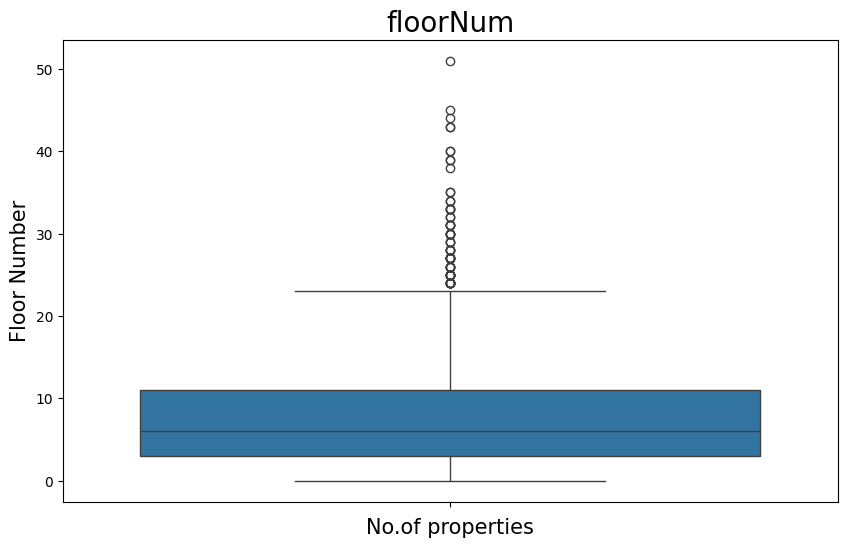

In [ ]:
#Boxplot of floorNum

plt.figure(figsize = (10,6))
sns.boxplot(df['floorNum'])

#Adding labels and title
plt.ylabel('Floor Number', fontsize=15)
plt.xlabel('No.of properties', fontsize=15)
plt.title('floorNum', fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

**facing Analysis**

In [ ]:
#No.of missing values
df['facing'].isnull().sum()

929

In [ ]:
#Fill NaN values with NA

df['facing'].fillna('NA',inplace=True)

In [ ]:
#No.of properties w.r.t facing

df['facing'].value_counts()

facing
NA            929
North-East    570
East          567
North         346
West          219
South         213
North-West    175
South-East    156
South-West    142
Name: count, dtype: int64

**agePossession Analysis**

In [ ]:
#No.of missing values

df['agePossession'].isnull().sum()

0

In [ ]:
#No.of properties w.r.t agePossession

df['agePossession'].value_counts()

agePossession
Relatively New        1575
New Property           581
Moderately Old         454
Under Construction     282
Undefined              237
Old Property           188
Name: count, dtype: int64

**super_builtup_area Analysis**

In [ ]:
#No.of missing values

df['super_built_up_area'].isnull().sum()

1402

In [ ]:
#Statistical Summary of super_built_up_area

df['super_built_up_area'].describe()

count     1915.000000
mean      1921.658251
std        767.160169
min         89.000000
25%       1457.000000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

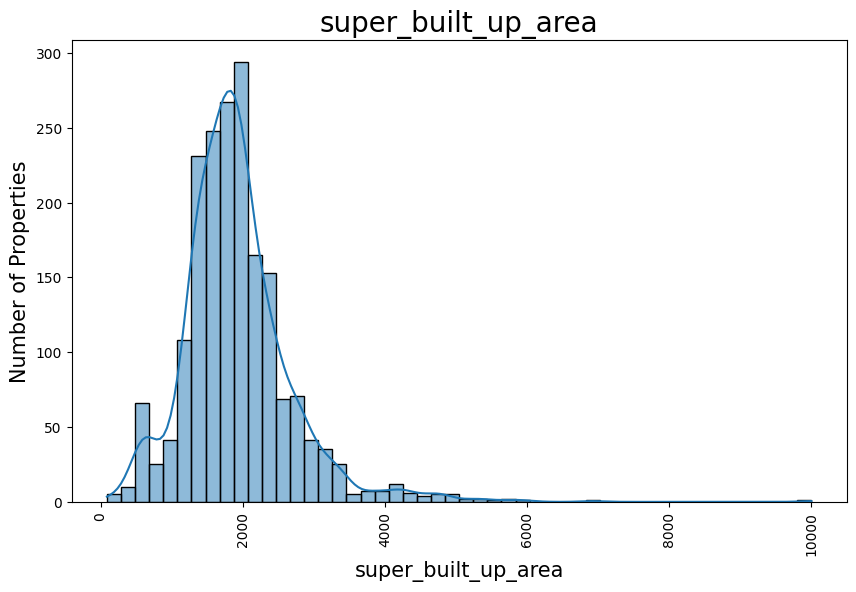

In [ ]:
#Histogram plot of super_built_up_area

plt.figure(figsize = (10,6))
sns.histplot(df['super_built_up_area'].dropna(), bins=50, kde=True)

#Adding labels and title
plt.ylabel('Number of Properties', fontsize=15)
plt.xlabel('super_built_up_area', fontsize=15)
plt.title('super_built_up_area', fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

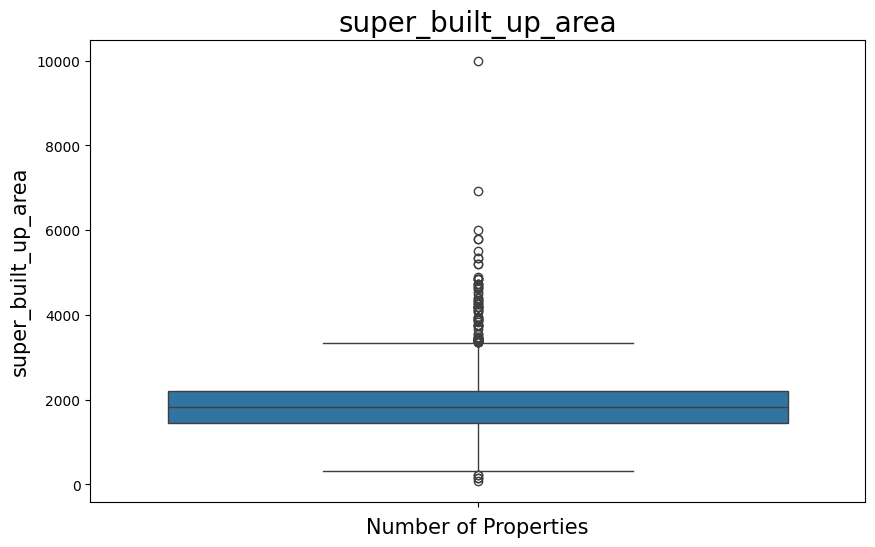

In [ ]:
#Boxplot of super_built_up_area

plt.figure(figsize = (10,6))
sns.boxplot(df['super_built_up_area'].dropna())

#Adding labels and title
plt.ylabel('super_built_up_area', fontsize=15)
plt.xlabel('Number of Properties', fontsize=15)
plt.title('super_built_up_area', fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

**built_up_area**

In [ ]:
#No.of missing values

df['built_up_area'].isnull().sum()

2037

In [ ]:
#Statistical summary of built_up_area

df['built_up_area'].describe()

count      1280.000000
mean       2539.449304
std       20592.684522
min          30.000000
25%        1218.565868
50%        1671.000000
75%        2300.000000
max      737147.000000
Name: built_up_area, dtype: float64

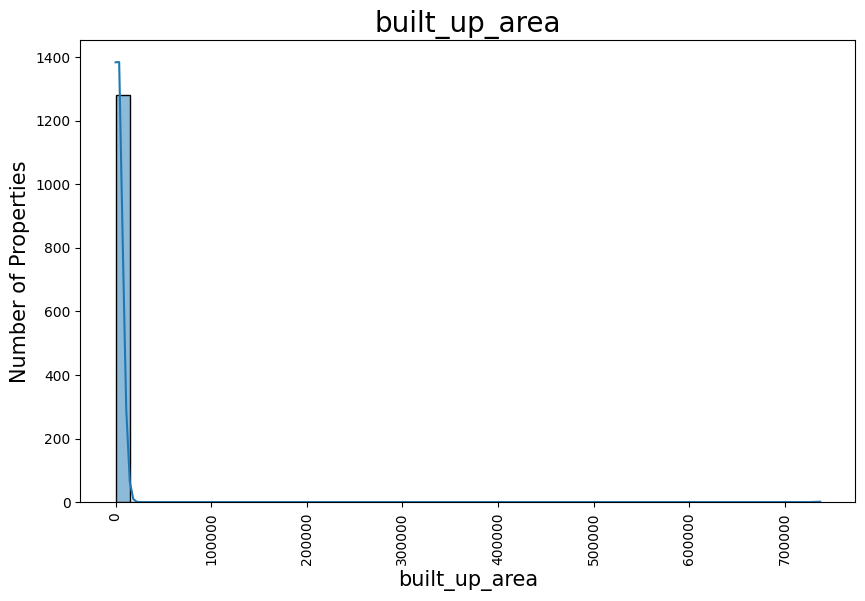

In [ ]:
#Histogram plot of built_up_area

plt.figure(figsize = (10,6))
sns.histplot(df['built_up_area'].dropna(), bins=50, kde=True)

#Adding labels and title
plt.ylabel('Number of Properties', fontsize=15)
plt.xlabel('built_up_area', fontsize=15)
plt.title('built_up_area', fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

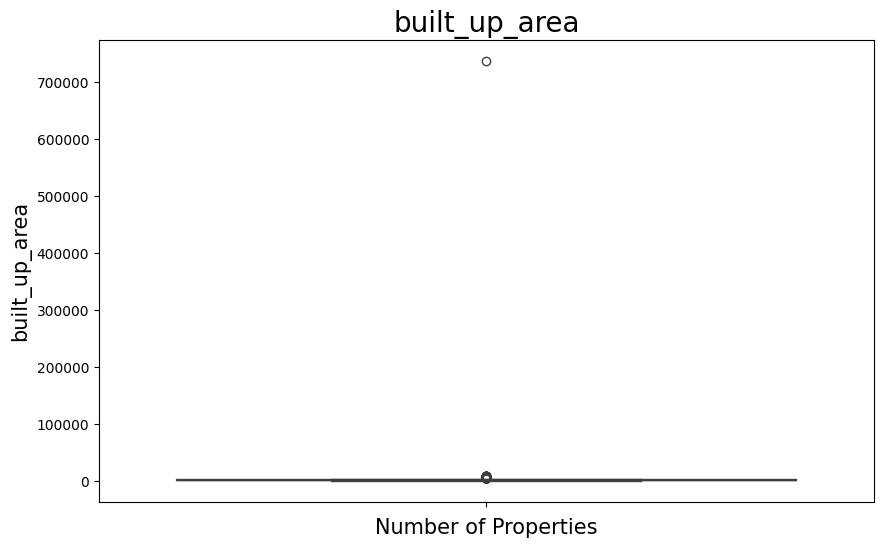

In [ ]:
#Boxplot of built_up_area

plt.figure(figsize = (10,6))
sns.boxplot(df['built_up_area'].dropna())

#Adding labels and title
plt.ylabel('built_up_area', fontsize=15)
plt.xlabel('Number of Properties', fontsize=15)
plt.title('built_up_area', fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

**carpet_area Analysis**

In [ ]:
#No.of missing values

df['carpet_area'].isnull().sum()

1461

In [ ]:
#Statistical Summary of carpet_area

df['carpet_area'].describe()

count      1856.000000
mean       2533.910958
std       22893.580605
min          15.000000
25%         861.477500
50%        1300.000000
75%        1784.250000
max      607936.000000
Name: carpet_area, dtype: float64

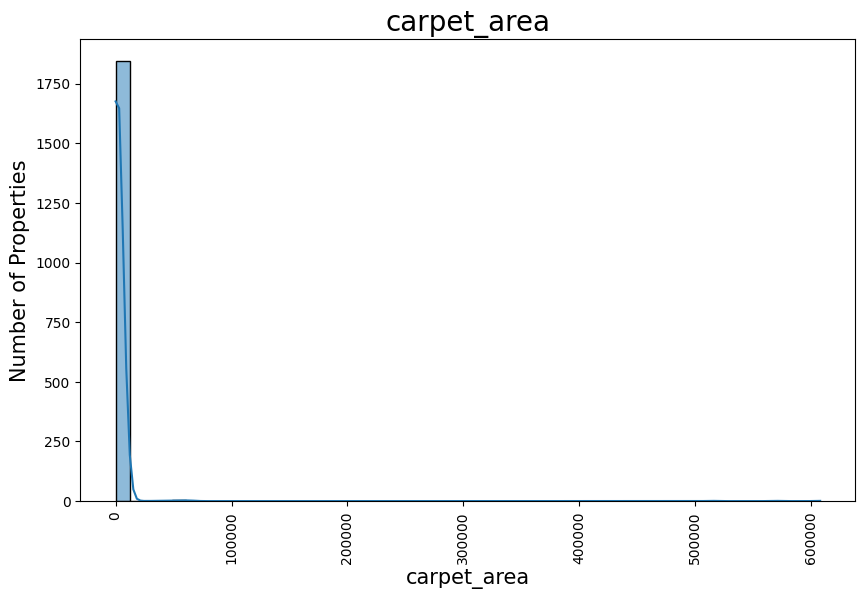

In [ ]:
#Histogram plot of carpet_area

plt.figure(figsize = (10,6))
sns.histplot(df['carpet_area'].dropna(), bins=50, kde=True)

#Adding labels and title
plt.ylabel('Number of Properties', fontsize=15)
plt.xlabel('carpet_area', fontsize=15)
plt.title('carpet_area', fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

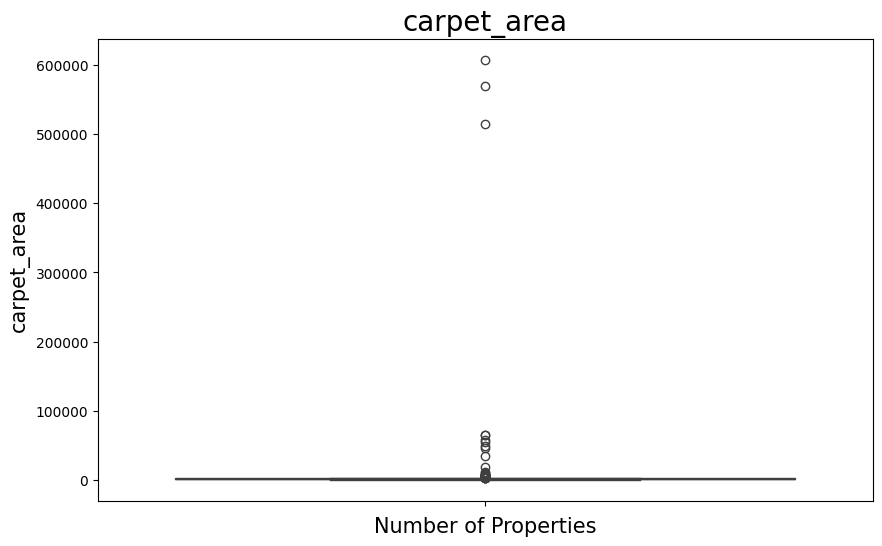

In [ ]:
#Boxplot of carpet_area

plt.figure(figsize = (10,6))
sns.boxplot(df['carpet_area'].dropna())

#Adding labels and title
plt.ylabel('carpet_area', fontsize=15)
plt.xlabel('Number of Properties', fontsize=15)
plt.title('carpet_area', fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

**Additional Rooms Analysis**

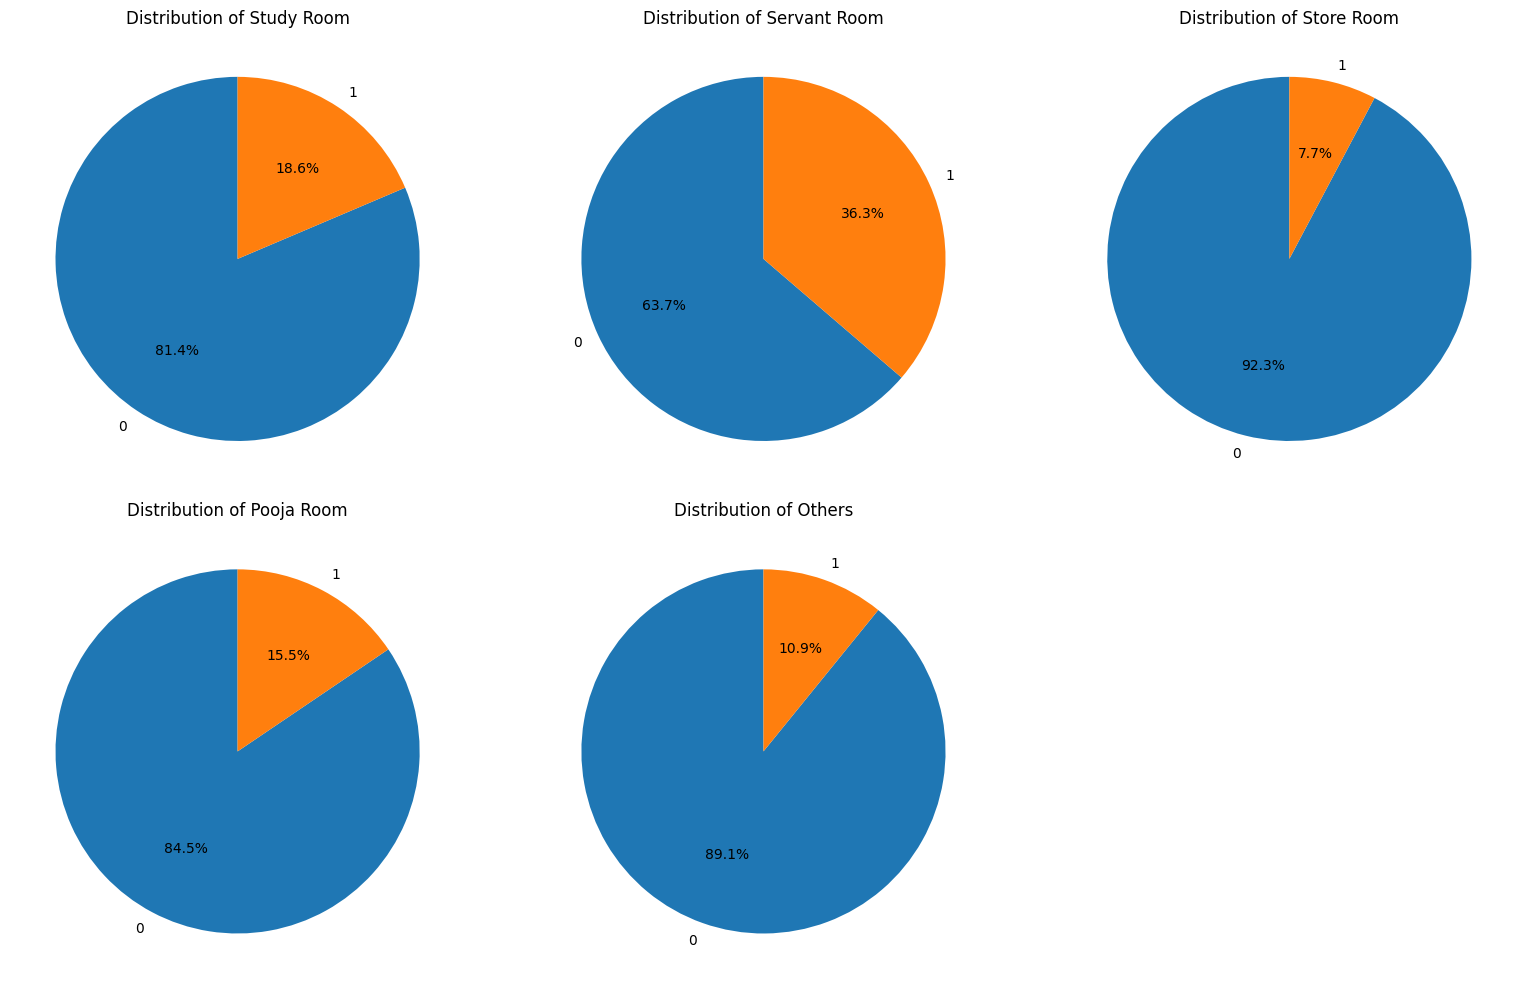

In [ ]:
plt.figure(figsize=(16, 10))

# Create a subplot of pie charts for each room type
for idx, room in enumerate(['study room','servant room','store room','pooja room','others'], 1):
    ax = plt.subplot(2, 3, idx)
    df[room].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax)
    plt.title(f'Distribution of {room.title()}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

**furnishing_type Analysis**

In [ ]:
#No.of properties w.r.t furnishing_type

df['furnishing_type'].value_counts()

furnishing_type
0    2205
1     930
2     182
Name: count, dtype: int64

Text(0, 0.5, 'furnishing_type')

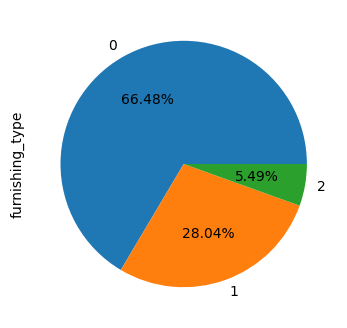

In [ ]:
#Piechart of furnishing_type

plt.figure(figsize = (5,4))
df['furnishing_type'].value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.ylabel('furnishing_type')

**luxury_score Analysis**

In [ ]:
#No.of missing values

df['luxury_score'].isnull().sum()

0

In [ ]:
#Statistical summary of luxury_score

df['luxury_score'].describe()

count    3317.000000
mean       76.780826
std        52.212102
min         0.000000
25%        40.000000
50%        65.000000
75%       116.000000
max       174.000000
Name: luxury_score, dtype: float64

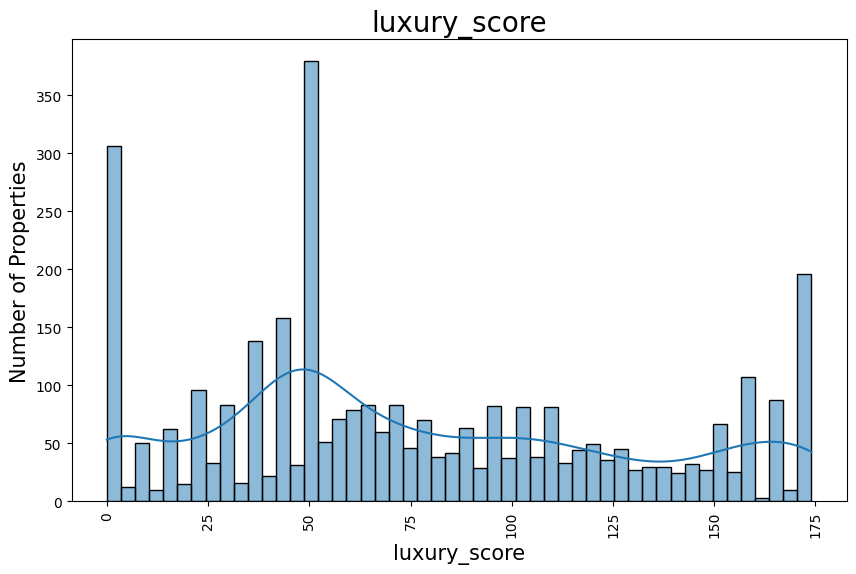

In [ ]:
#Histogram plot of luxury_score

plt.figure(figsize = (10,6))
sns.histplot(df['luxury_score'], bins=50, kde=True)

#Adding labels and title
plt.ylabel('Number of Properties', fontsize=15)
plt.xlabel('luxury_score', fontsize=15)
plt.title('luxury_score', fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

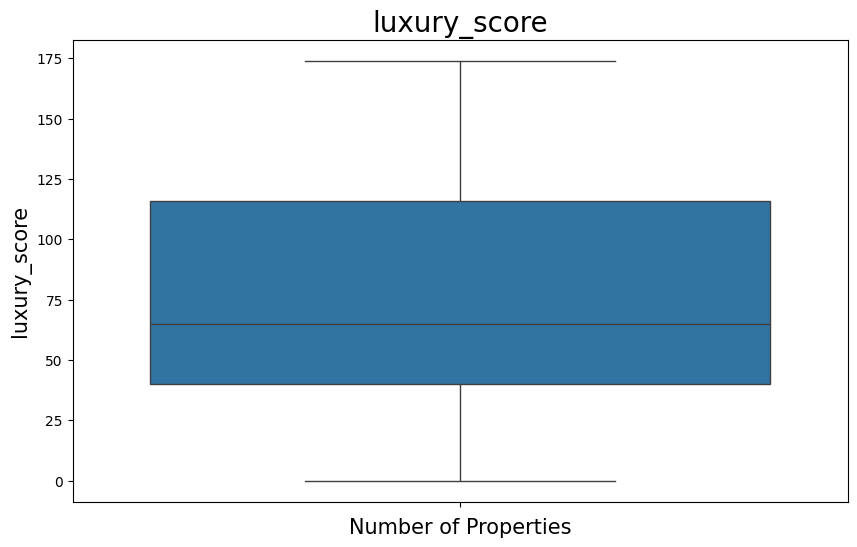

In [ ]:
#Boxplot of luxury_score

plt.figure(figsize = (10,6))
sns.boxplot(df['luxury_score'].dropna())

#Adding labels and title
plt.ylabel('luxury_score', fontsize=15)
plt.xlabel('Number of Properties', fontsize=15)
plt.title('luxury_score', fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

# **Multi-Variate Analysis**

**Initial Data Exploration**

In [ ]:
#Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
property_type             0
society                   1
sector                    0
price                    13
price_per_sqft           13
area                     13
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 10
facing                    0
agePossession             0
super_built_up_area    1402
built_up_area          2037
carpet_area            1461
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
price_bin                13
dtype: int64


**property_type vs price**

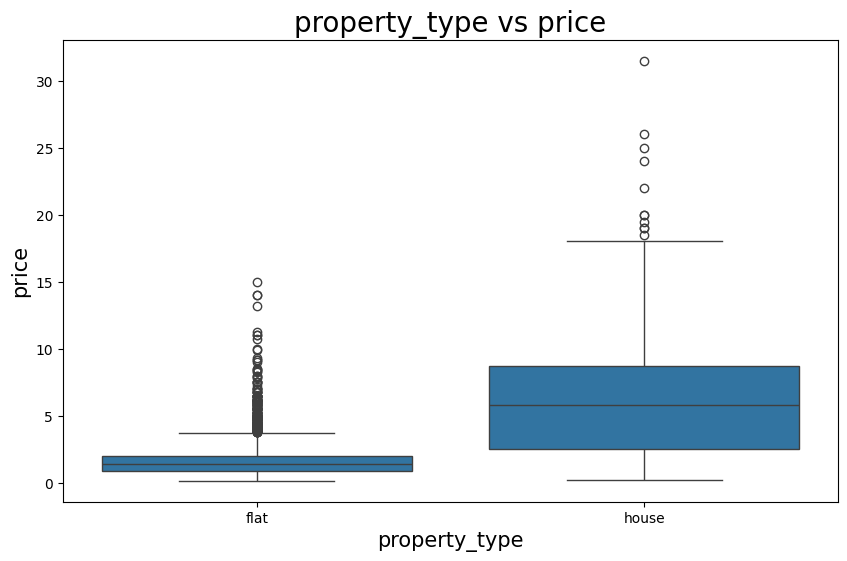

In [ ]:
#Boxplot of property_type vs price

plt.figure(figsize= (10,6))
sns.boxplot(x=df['property_type'], y=df['price'])

#Adding labels and title
plt.ylabel('price', fontsize=15)
plt.xlabel('property_type', fontsize=15)
plt.title('property_type vs price', fontsize=20)
plt.show()

**property_type vs built_up_area**

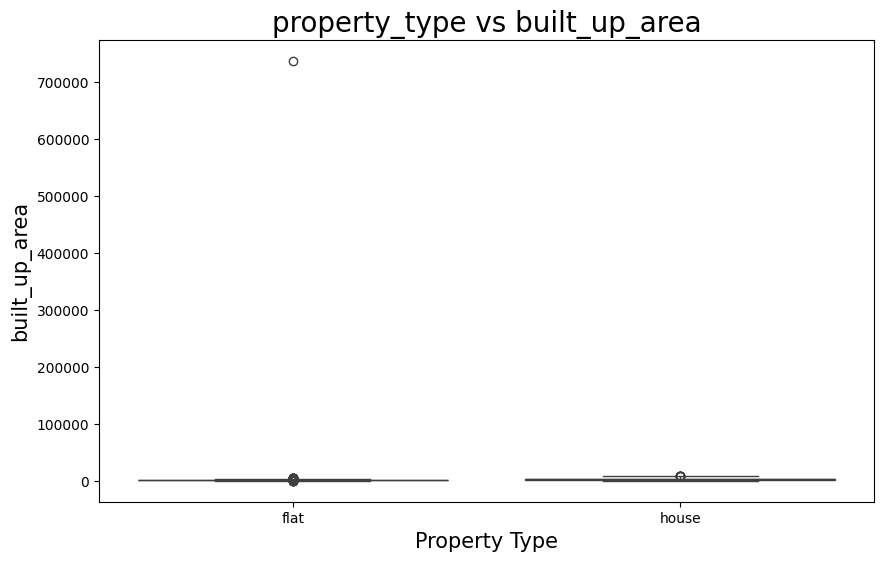

In [ ]:
#Boxplot of property_type vs built_up_area

plt.figure(figsize= (10,6))
sns.boxplot(x=df['property_type'], y=df['built_up_area'])

#Adding labels and title
plt.ylabel('built_up_area', fontsize=15)
plt.xlabel('Property Type', fontsize=15)
plt.title('property_type vs built_up_area', fontsize=20)
plt.show()

**property_type vs price_per_sqft**

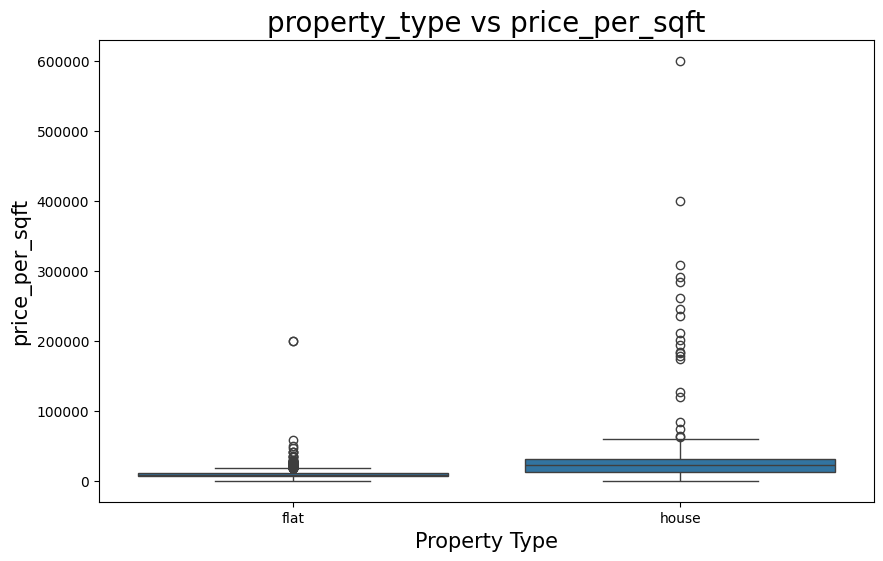

In [ ]:
#Boxplot of property_type vs price_per_sqft

plt.figure(figsize= (10,6))
sns.boxplot(x=df['property_type'], y=df['price_per_sqft'])

#Adding labels and title
plt.ylabel('price_per_sqft', fontsize=15)
plt.xlabel('Property Type', fontsize=15)
plt.title('property_type vs price_per_sqft', fontsize=20)
plt.show()

In [ ]:
#Checking for outliers

df[df['price_per_sqft'] > 100000][['property_type','society','sector','price','price_per_sqft','area','areaWithType', 'super_built_up_area', 'built_up_area', 'carpet_area']]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,super_built_up_area,built_up_area,carpet_area
229,house,rk excelo,sector 12,0.60,120000.0,50.0,Plot area 50(4.65 sq.m.)Built Up area: 30 sq.f...,NaN,30.0,15.0
342,house,unitech nirvana birch court,sector 50,7.10,283333.0,251.0,Plot area 240(22.3 sq.m.),NaN,240.0,NaN
867,house,ardee city,sector 52,5.50,183333.0,300.0,Plot area 300(27.87 sq.m.),NaN,300.0,NaN
975,house,uppal southend,sector 49,6.75,290948.0,232.0,Plot area 232(21.55 sq.m.),NaN,232.0,NaN
1027,house,dlf the grove,sector 54,5.70,211111.0,270.0,Built Up area: 270 (25.08 sq.m.),NaN,270.0,NaN
1259,house,vipul tatvam villa,sector 48,7.25,201388.0,360.0,Plot area 360(33.45 sq.m.),NaN,360.0,NaN
1385,house,unitech uniworld resorts,sector 33,9.50,173992.0,546.0,Plot area 546(50.73 sq.m.),NaN,546.0,NaN
1628,house,eros rosewood villas,sector 49,2.75,178571.0,154.0,Plot area 154(14.31 sq.m.)Carpet area: 1650 sq...,NaN,NaN,1650.0
2047,house,ansal,sector 43,1.85,308333.0,60.0,Plot area 60(5.57 sq.m.),NaN,60.0,NaN
2161,house,dlf city plots phase 2,sector 25,10.50,261194.0,402.0,Plot area 402(37.35 sq.m.),NaN,402.0,NaN


**property_type vs bedRoom**

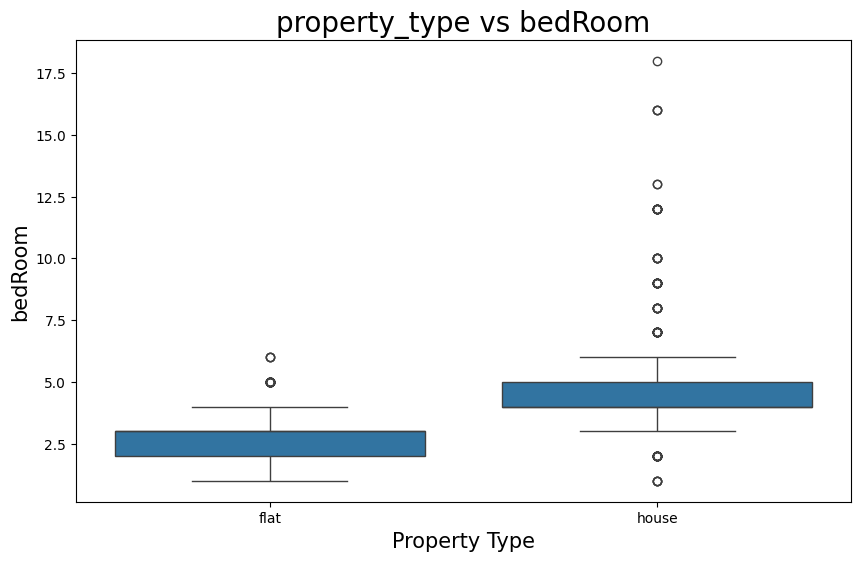

In [ ]:
#Boxplot of property_type vs bedRoom

plt.figure(figsize= (10,6))
sns.boxplot(x=df['property_type'], y=df['bedRoom'])

#Adding labels and title
plt.ylabel('bedRoom', fontsize=15)
plt.xlabel('Property Type', fontsize=15)
plt.title('property_type vs bedRoom', fontsize=20)
plt.show()

**property_type vs floorNum**

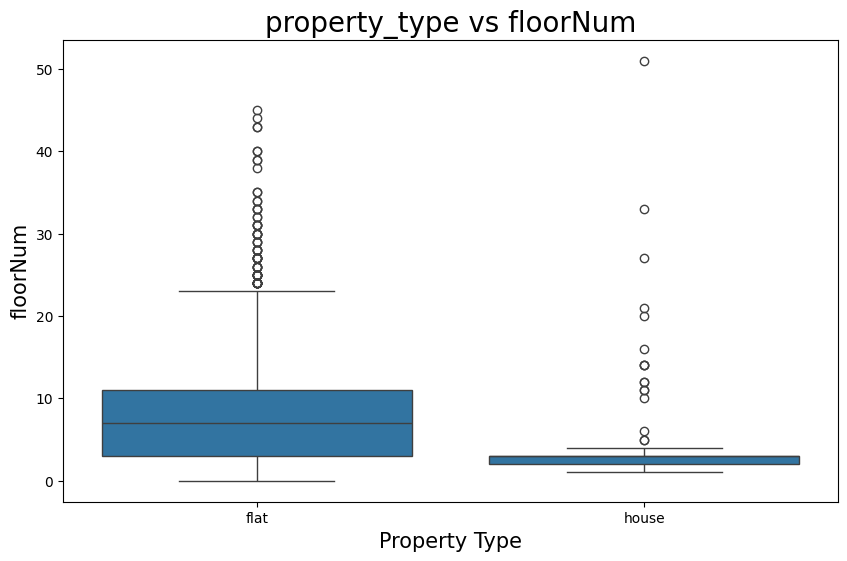

In [ ]:
#Boxplot of property_type vs floorNum

plt.figure(figsize= (10,6))
sns.boxplot(x=df['property_type'], y=df['floorNum'])

#Adding labels and title
plt.ylabel('floorNum', fontsize=15)
plt.xlabel('Property Type', fontsize=15)
plt.title('property_type vs floorNum', fontsize=20)
plt.show()

**property_type vs agePossession**

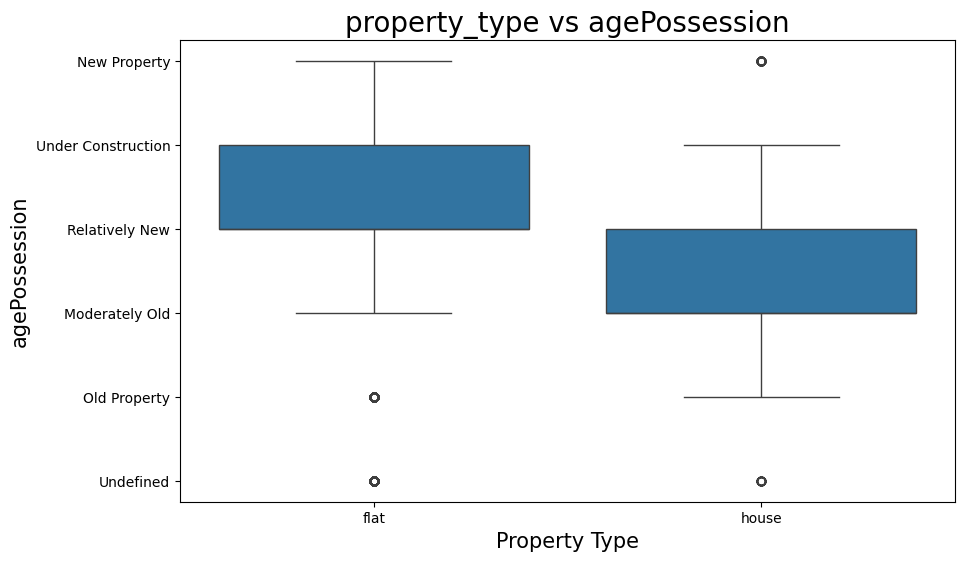

In [ ]:
#Boxplot of property_type vs agePossession

plt.figure(figsize= (10,6))
sns.boxplot(x=df['property_type'], y=df['agePossession'])

#Adding labels and title
plt.ylabel('agePossession', fontsize=15)
plt.xlabel('Property Type', fontsize=15)
plt.title('property_type vs agePossession', fontsize=20)
plt.show()

**property_type vs luxury_score**

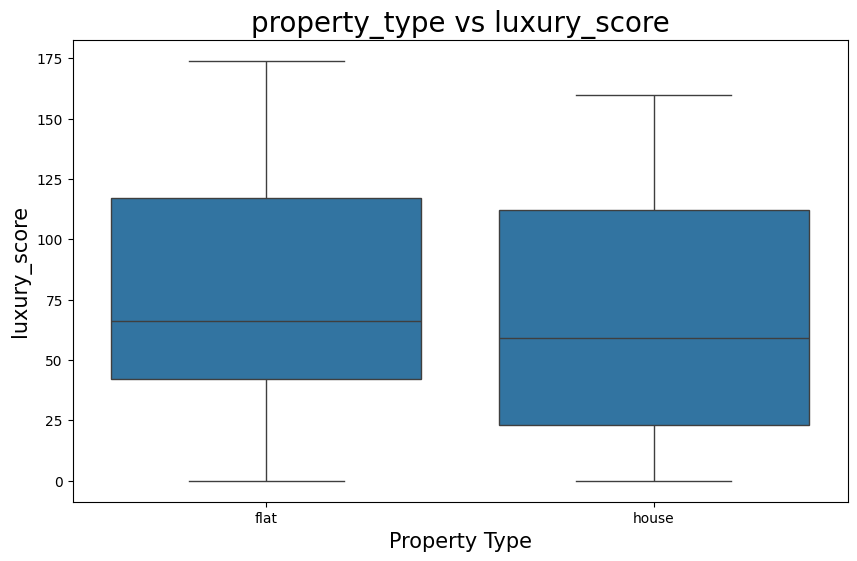

In [ ]:
#Boxplot of property_type vs luxury_score

plt.figure(figsize= (10,6))
sns.boxplot(x=df['property_type'], y=df['luxury_score'])

#Adding labels and title
plt.ylabel('luxury_score', fontsize=15)
plt.xlabel('Property Type', fontsize=15)
plt.title('property_type vs luxury_score', fontsize=20)
plt.show()

**Sector vs price Analysis**

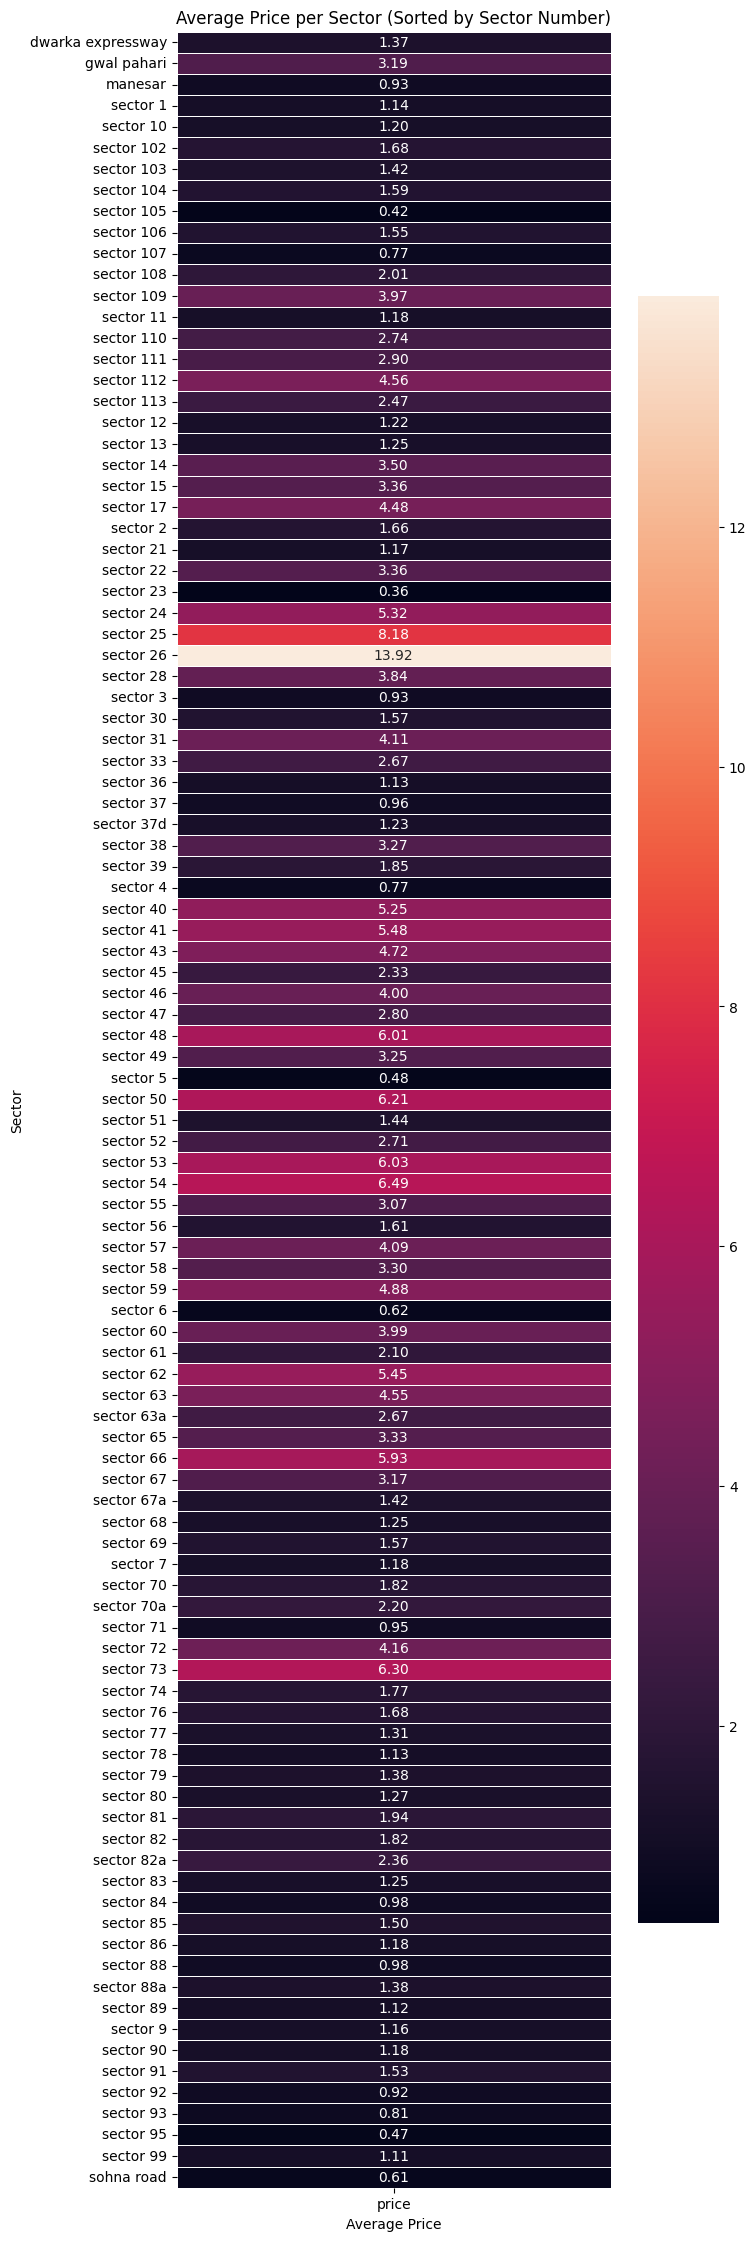

In [ ]:
#Heat map Analysis of Sector vs Price

import re
#Group by 'sector' and calculate the average price
avg_price_per_sector = df.groupby('sector')['price'].mean().reset_index()

avg_price_per_sector['sector_number'] = avg_price_per_sector['sector']

#Sort by sector number
avg_price_per_sector_sorted_by_sector = avg_price_per_sector.sort_values(by='sector_number')

#Plot the heatmap
plt.figure(figsize=(7, 28))
sns.heatmap(avg_price_per_sector_sorted_by_sector.set_index('sector')[['price']], annot=True, fmt=".2f", linewidths=.5)
plt.title('Average Price per Sector (Sorted by Sector Number)')
plt.xlabel('Average Price')
plt.ylabel('Sector')
plt.show()

**Scatter Plots**

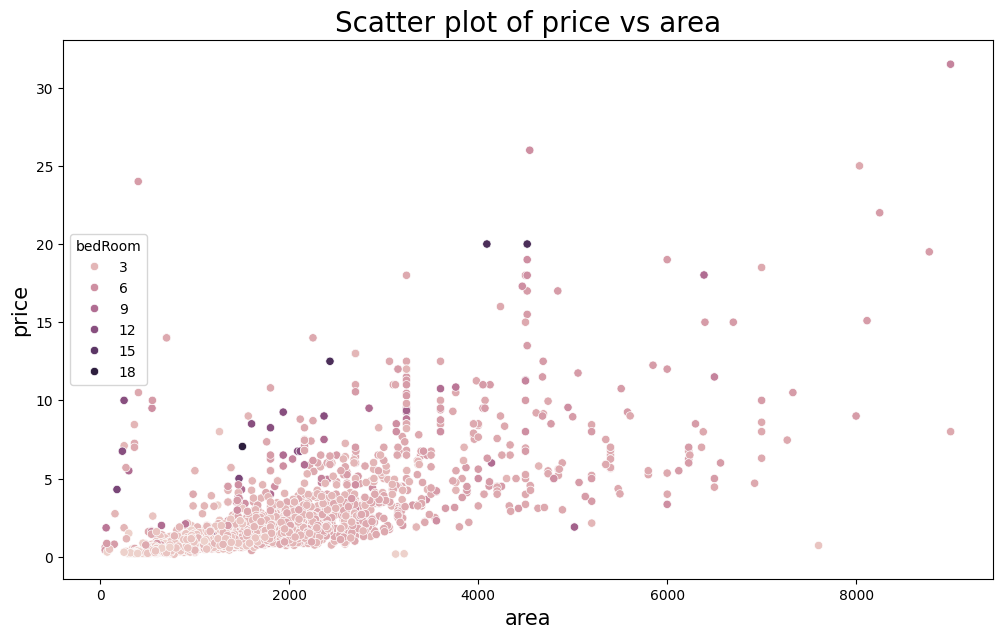

In [ ]:
#Scatter plot of price vs area & hue as bedRoom

plt.figure(figsize=(12, 7))
sns.scatterplot(data=df[df['area'] < 10000], x='area', y='price', hue='bedRoom')

#Adding labels and title
plt.ylabel('price', fontsize=15)
plt.xlabel('area', fontsize=15)
plt.title('Scatter plot of price vs area', fontsize=20)
plt.show()

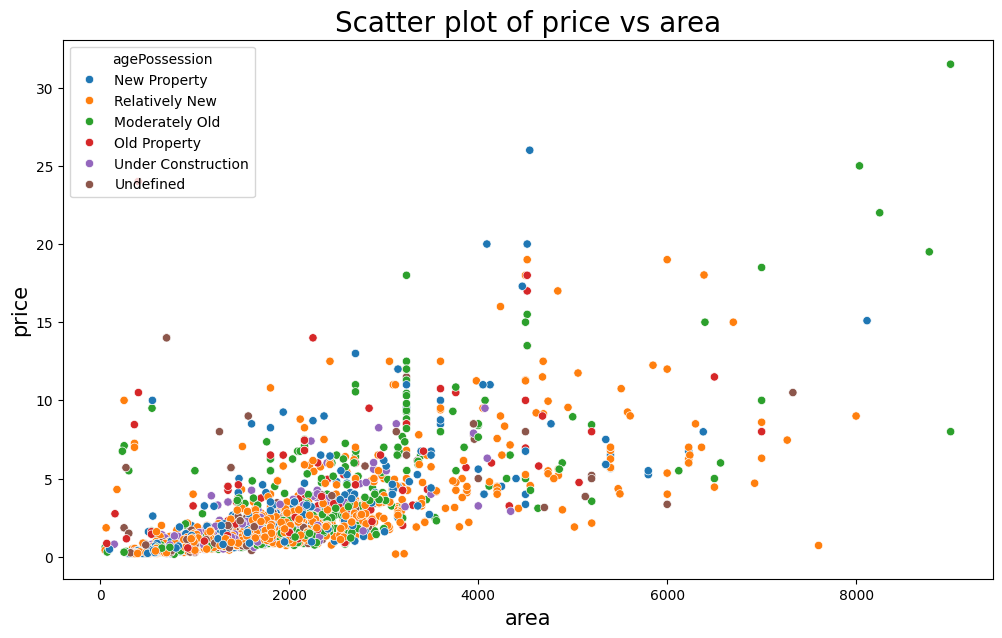

In [ ]:
#Scatter plot of price vs area & hue as agePossession

plt.figure(figsize=(12, 7))
sns.scatterplot(data=df[df['area'] < 10000], x='area', y='price', hue='agePossession')

#Adding labels and title
plt.ylabel('price', fontsize=15)
plt.xlabel('area', fontsize=15)
plt.title('Scatter plot of price vs area', fontsize=20)
plt.show()

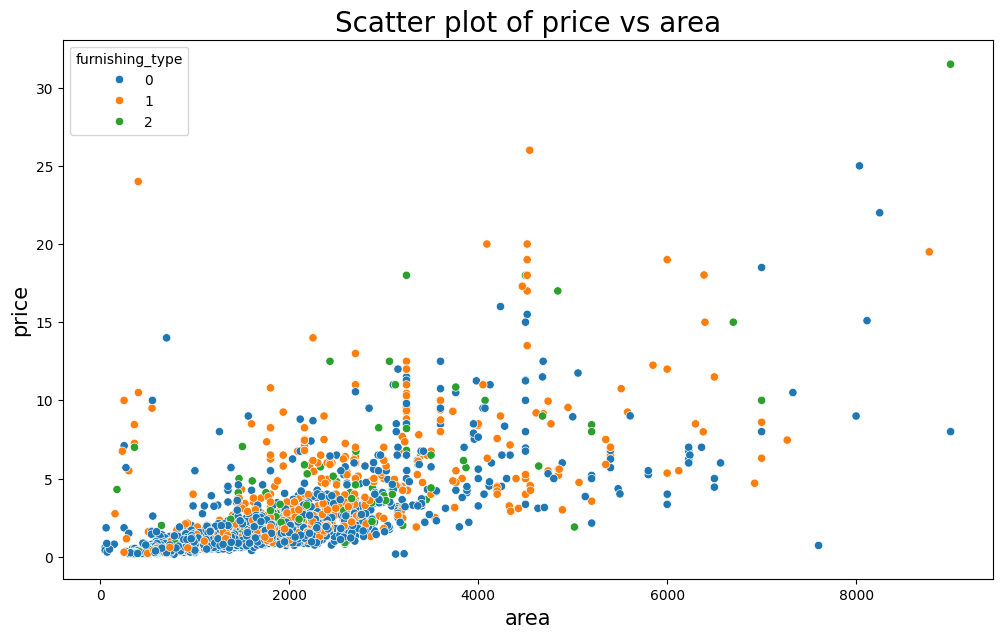

In [ ]:
#Scatter plot of price vs area & hue as furnishing_type

plt.figure(figsize=(12, 7))
df['furnishing_type'] = df['furnishing_type'].astype('category')
sns.scatterplot(data=df[df['area'] < 10000], x='area', y='price', hue='furnishing_type')

#Adding labels and title
plt.ylabel('price', fontsize=15)
plt.xlabel('area', fontsize=15)
plt.title('Scatter plot of price vs area', fontsize=20)
plt.show()

In [ ]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,price_bin
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,2.0,NA,New Property,1081.0,NaN,650.0,0,0,0,0,0,0,8,0-1 Crore
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,4.0,NA,New Property,NaN,NaN,1103.0,1,1,0,0,0,0,38,0-1 Crore
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,0.0,NA,Under Construction,NaN,NaN,58141.0,0,0,0,0,0,0,15,0-1 Crore
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,17.0,NA,New Property,NaN,1000.0,585.0,0,0,0,0,0,0,49,0-1 Crore
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,10.0,North-West,Relatively New,1995.0,1615.0,1476.0,0,1,0,0,1,1,174,1-2 Crore


**Exporting the Explored Data to CSV file**

In [ ]:
df.to_csv('gurgaonrealestate_dataexploration.csv',index=False)